# <img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project: Movielens Dataset Analysis

#### The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config IPCompleter.greedy=True

## Import the three datasets

In [3]:
movies = pd.read_csv('movies.dat', sep = "::", names = ['MovieID', 'Title', 'Genres'], engine='python')
ratings = pd.read_csv('ratings.dat', sep = "::", names = ['UserID','MovieID', 'Rating', 'Timestamp'], engine='python')
users = pd.read_csv('users.dat', sep = "::", names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], engine='python')

In [4]:
movies.head(5)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head(5)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users.head(5)

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

In [7]:
movie_data = pd.merge(movies , ratings , on = "MovieID")[["MovieID","Title","Genres","Rating","UserID" ,"Timestamp"]]

In [8]:
Master_Data = pd.merge(movie_data , users, on ="UserID")[["MovieID" ,"Title", "Genres" ,"UserID", "Age", "Gender", "Occupation", "Rating" ,"Timestamp"]]

In [9]:
Master_Data.isnull().any()

MovieID       False
Title         False
Genres        False
UserID        False
Age           False
Gender        False
Occupation    False
Rating        False
Timestamp     False
dtype: bool

In [10]:
Master_Data.dtypes

MovieID        int64
Title         object
Genres        object
UserID         int64
Age            int64
Gender        object
Occupation     int64
Rating         int64
Timestamp      int64
dtype: object

In [11]:
Master_Data.head(5)


,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,F,10,5,978824268
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,F,10,5,978824351
2,150,Apollo 13 (1995),Drama,1,1,F,10,5,978301777
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,F,10,4,978300760
4,527,Schindler's List (1993),Drama|War,1,1,F,10,5,978824195


## Explore the datasets using visual representations (graphs or tables), also include your comments on the following:



### User Age Distribution

In [12]:
%matplotlib inline

Text(0, 0.5, 'Density')

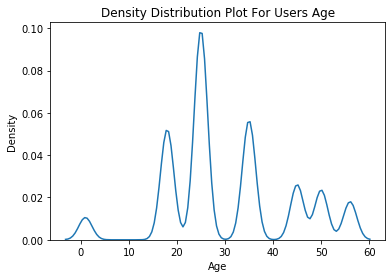

In [13]:
sns.distplot(users['Age'] , hist = False , kde = True , bins = 50 )
plt.title('Density Distribution Plot For Users Age')
plt.ylabel('Density')

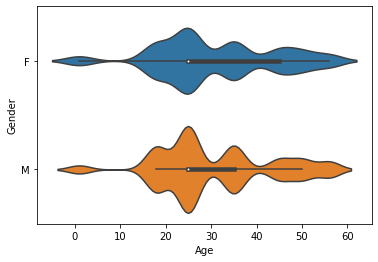

In [14]:
sns.violinplot(users['Age'], users['Gender'])

In [15]:
#pivoted Movie Rating Table per user
#user_Ratings = Master_Data.pivot_table(index = ["UserID"] , columns = ["Title"] , values = ["Rating"])
#user_Ratings.columns
#plt.figure(figsize=(16, 16))
#sns.heatmap(user_Ratings.corr(method = 'pearson', min_periods = 20 ), xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10} , cbar = True)

In [16]:
#user_Ratings.head()

### Overall Ratings by all Users

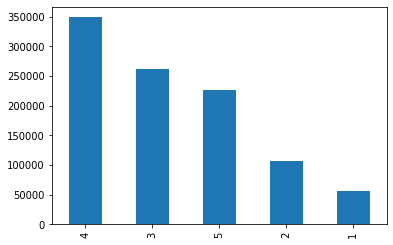

In [17]:
Master_Data['Rating'].value_counts().plot(kind='bar',alpha=1)
plt.show()

### User Rating For the Movie Toy-Story

In [18]:
usr_rating_toy_story = Master_Data[Master_Data['Title'].str.match('Toy Story')]
usr_rating_toy_story.head()

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,F,10,5,978824268
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,1,F,10,4,978302174
53,1,Toy Story (1995),Animation|Children's|Comedy,6,50,F,9,4,978237008
124,1,Toy Story (1995),Animation|Children's|Comedy,8,25,M,12,4,978233496
263,1,Toy Story (1995),Animation|Children's|Comedy,9,25,M,17,5,978225952


Text(0, 0.5, 'Density')

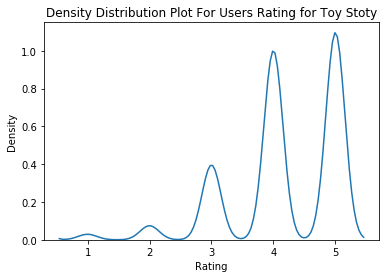

In [19]:
sns.distplot(usr_rating_toy_story['Rating'] , hist = False , kde = True , bins = 50 )
plt.title('Density Distribution Plot For Users Rating for Toy Stoty')
plt.ylabel('Density')

Text(0.5, 1.0, 'Toy Story Movie Ratings as per Age')

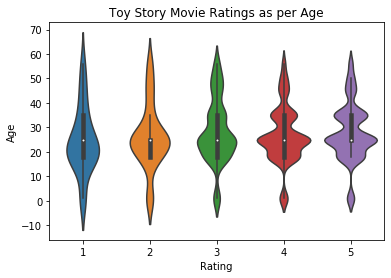

In [20]:
sns.violinplot(usr_rating_toy_story['Rating'], usr_rating_toy_story['Age'])
plt.title('Toy Story Movie Ratings as per Age')

Age
1      211
18     779
25    1368
35     765
45     255
50     180
56     104
Name: MovieID, dtype: int64

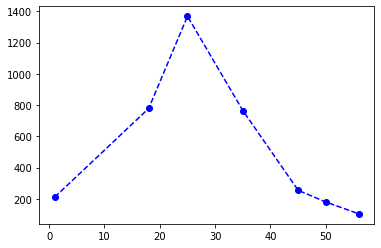

In [21]:
plt.plot(usr_rating_toy_story.groupby("Age")["MovieID"].count(),'--bo')
usr_rating_toy_story.groupby("Age")["MovieID"].count()

###  Top 25 movies by rating

In [22]:
movie_data = Master_Data

In [23]:
titlewise_mean = pd.DataFrame(movie_data.groupby('Title')['Rating'].mean()).sort_values('Rating' , ascending=False)
top_25 = titlewise_mean.head(25)
top_25_detail = pd.merge(top_25 , Master_Data , on = "Title")
display(top_25_detail)
display(top_25)

,Title,Rating_x,MovieID,Genres,UserID,Age,Gender,Occupation,Rating_y,Timestamp
0,Ulysses (Ulisse) (1954),5.000000,3172,Adventure,3485,25,M,0,5,967060437
1,Lured (1947),5.000000,3656,Crime,5313,56,M,0,5,960920392
2,Follow the Bitch (1998),5.000000,1830,Comedy,2869,50,M,17,5,972439040
3,Bittersweet Motel (2000),5.000000,3881,Documentary,2885,18,F,1,5,972452947
4,Song of Freedom (1936),5.000000,3382,Drama,5334,56,F,13,5,960796159
5,One Little Indian (1973),5.000000,3607,Comedy|Drama|Western,5851,18,F,20,5,957756608
6,Smashing Time (1967),5.000000,3233,Comedy,3428,45,M,1,5,967343582
7,Smashing Time (1967),5.000000,3233,Comedy,4038,50,M,6,5,965505565
8,Schlafes Bruder (Brother of Sleep) (1995),5.000000,989,Drama,1915,50,M,13,5,974693867
9,"Gate of Heavenly Peace, The (1995)",5.000000,787,Documentary,149,25,M,1,5,977325719


,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


Text(0.5, 1.0, 'Rating Frequencies')

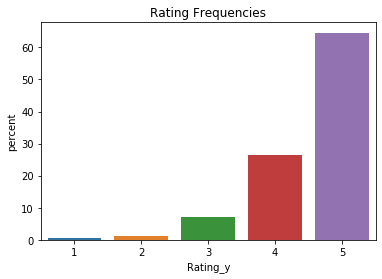

In [24]:
norm_counts = (
    top_25_detail['Rating_y']
    .value_counts(normalize=True, sort=False)
    .multiply(100)
    .reset_index()
    .rename(columns={'Rating_y': 'percent', 'index': 'Rating_y'})
)
ax = sns.barplot(x='Rating_y', y='percent', data=norm_counts)
ax.set_title('Rating Frequencies')

#### Top 25 Movies by Viewership

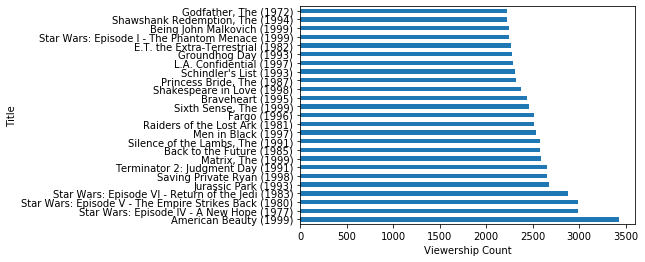

In [25]:
data_count = movie_data['Title'].value_counts()
data_count[0:25].sort_values(ascending = False)
plt.ylabel("Title")
plt.xlabel("Viewership Count")
data_count[0:25].plot(kind="barh")

## Ratings for all the movies reviewed by for a particular user of user id = 2696

,MovieID,Title,Genres,UserID,Age,Gender,Occupation,Rating,Timestamp
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,25,M,7,3,973308690
991046,1711,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,2696,25,M,7,4,973308904
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,25,M,7,2,973308676
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,25,M,7,3,973308865
991048,1805,Wild Things (1998),Crime|Drama|Mystery|Thriller,2696,25,M,7,4,973308886
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,25,M,7,4,973308842
991045,1645,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller,2696,25,M,7,4,973308904
991051,2389,Psycho (1998),Crime|Horror|Thriller,2696,25,M,7,4,973308710
991036,800,Lone Star (1996),Drama|Mystery,2696,25,M,7,5,973308842
991054,3386,JFK (1991),Drama|Mystery,2696,25,M,7,1,973308842


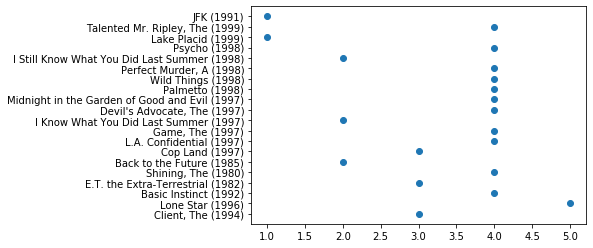

In [26]:
display(Master_Data[Master_Data['UserID'] == 2696].sort_values('Rating' , ascending=False).sort_values('Genres'))
plt.scatter(y=Master_Data[Master_Data['UserID'] == 2696].Title, x=Master_Data[Master_Data['UserID'] == 2696].Rating)

## Feature Engineering
### Use column genres

#### Find out all the unique genres

In [27]:
data = Master_Data
mylist = data['Genres'].unique().tolist()
#type(data['Genres'].str.split('|'))
#Genres = data.Genres.str.split('|')

range(len(mylist))
mylist[0].split('|')
x = []
for i in range(len(mylist)):
    x = x + mylist[i].split('|')
unique_Genres_list = list(set(x))

In [28]:
unique_Genres_list

['Mystery',
 'Sci-Fi',
 'Musical',
 "Children's",
 'Romance',
 'Crime',
 'Thriller',
 'Drama',
 'Adventure',
 'Action',
 'Fantasy',
 'Documentary',
 'Horror',
 'Animation',
 'Western',
 'War',
 'Comedy',
 'Film-Noir']

In [29]:
unique_Genres = pd.Series(unique_Genres_list)

In [30]:
unique_Genres

0         Mystery
1          Sci-Fi
2         Musical
3      Children's
4         Romance
5           Crime
6        Thriller
7           Drama
8       Adventure
9          Action
10        Fantasy
11    Documentary
12         Horror
13      Animation
14        Western
15            War
16         Comedy
17      Film-Noir
dtype: object

### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre

In [31]:
df = data['Genres'].str.get_dummies('|')
df_g = pd.get_dummies(data['Gender'])
new_data_set = pd.concat((data , df, df_g) ,axis = 1)

In [32]:
new_data_set.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Age', 'Gender', 'Occupation',
       'Rating', 'Timestamp', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'F', 'M'],
      dtype='object')

In [33]:
new_data_set[['Title', 'Age', 'Occupation', 'Rating', 'Timestamp', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'F', 'M']]

,Title,Age,Occupation,Rating,Timestamp,Action,Adventure,Animation,Children's,Comedy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,Toy Story (1995),1,10,5,978824268,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,Pocahontas (1995),1,10,5,978824351,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,Apollo 13 (1995),1,10,5,978301777,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Star Wars: Episode IV - A New Hope (1977),1,10,4,978300760,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Schindler's List (1993),1,10,5,978824195,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,"Secret Garden, The (1993)",1,10,4,978302149,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,Aladdin (1992),1,10,4,978824268,0,0,1,1,1,...,0,1,0,0,0,0,0,0,1,0
7,Snow White and the Seven Dwarfs (1937),1,10,4,978302268,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
8,Beauty and the Beast (1991),1,10,5,978824268,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
9,Fargo (1996),1,10,4,978301398,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Determine the features affecting the ratings of any particular movie

In [34]:
feature_cols=['Age', 'Rating','Occupation', 'Timestamp', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'F', 'M']

In [35]:
corr = new_data_set[feature_cols].corr()
corr

,Age,Rating,Occupation,Timestamp,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
Age,1.000000,0.056869,0.078371,-0.064562,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,-0.007931,...,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177,0.003189,-0.003189
Rating,0.056869,1.000000,0.006753,-0.026770,-0.047633,-0.036718,0.019670,-0.039829,-0.039622,0.033446,...,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311,0.019861,-0.019861
Occupation,0.078371,0.006753,1.000000,0.015646,0.018347,0.014309,-0.003834,-0.006906,-0.006149,0.002821,...,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924,-0.114974,0.114974
Timestamp,-0.064562,-0.026770,0.015646,1.000000,-0.032990,-0.023252,0.000840,-0.000991,0.006064,-0.009597,...,-0.007079,0.000378,-0.006836,-0.004799,-0.024150,-0.011591,-0.014109,-0.006230,0.008895,-0.008895
Action,-0.030975,-0.047633,0.018347,-0.032990,1.000000,0.374961,-0.110294,-0.141314,-0.268092,0.088519,...,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242,-0.094380,0.094380
Adventure,-0.016730,-0.036718,0.014309,-0.023252,0.374961,1.000000,0.004732,0.098283,-0.124960,-0.045924,...,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964,-0.038645,0.038645
Animation,-0.047020,0.019670,-0.003834,0.000840,-0.110294,0.004732,1.000000,0.576204,0.018544,-0.062520,...,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908,0.017719,-0.017719
Children's,-0.052858,-0.039829,-0.006906,-0.000991,-0.141314,0.098283,0.576204,1.000000,0.058711,-0.081977,...,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269,0.031662,-0.031662
Comedy,-0.044046,-0.039622,-0.006149,0.006064,-0.268092,-0.124960,0.018544,0.058711,1.000000,-0.078030,...,-0.093064,0.030566,-0.105346,0.112843,-0.187079,-0.299501,-0.127101,0.007927,0.040758,-0.040758
Crime,-0.007931,0.033446,0.002821,-0.009597,0.088519,-0.045924,-0.062520,-0.081977,-0.078030,1.000000,...,-0.047899,-0.061179,0.080093,-0.073320,-0.083730,0.115095,-0.079715,-0.042711,-0.027065,0.027065


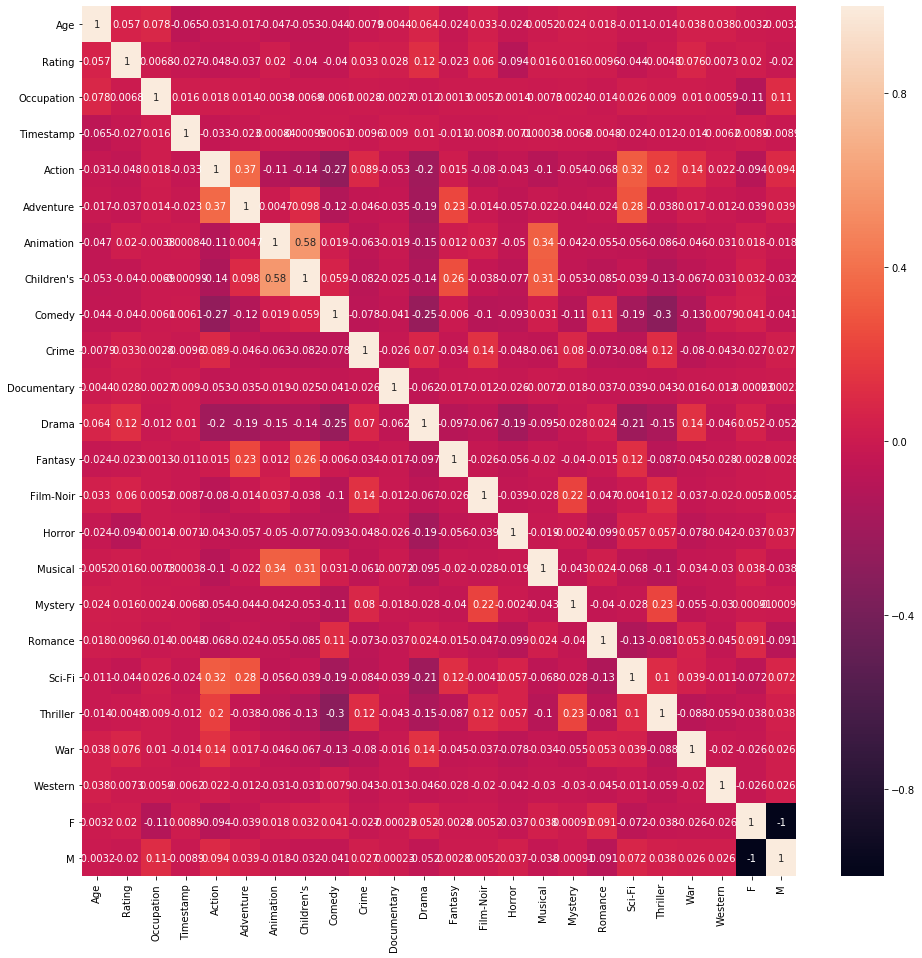

In [36]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10} , cbar = True)

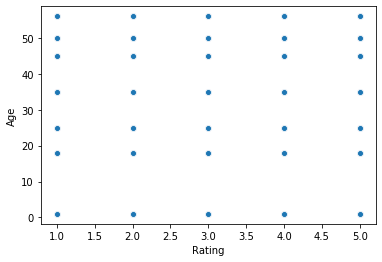

In [37]:
sns.scatterplot(x="Rating" , y ="Age" , data = Master_Data)

##### The above plot shows that the Ratigs are uniform over all age groups and hence there is no definate Relation between Age and Movie Ratings.

### Develop an appropriate model to predict the movie ratings

In [38]:
import statsmodels.api as sm

In [39]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [40]:
Y_Target = new_data_set.Rating
X_Features = sm.add_constant(new_data_set[['Age', 'Occupation', 'Timestamp', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'F', 'M']])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_Features,Y_Target,test_size = 0.7,random_state = None)

In [43]:
linReg = sm.OLS(y_train , X_train).fit()

In [44]:
significant_vars = get_significant_vars( linReg )

In [45]:
significant_vars.remove('const')

In [46]:
fin_linReg = sm.OLS(y_train , X_train[significant_vars]).fit()

In [47]:
X_test.shape , X_train.shape , y_train.shape , y_test.shape

((700147, 24), (300062, 24), (300062,), (700147,))

In [48]:
y_pred = round(fin_linReg.predict(X_test[significant_vars]))

In [49]:
type(y_pred) , type(y_test)

(pandas.core.series.Series, pandas.core.series.Series)

In [50]:
from sklearn import metrics

In [51]:
print(metrics.classification_report(y_test , y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     39340
           2       0.00      0.00      0.00     75548
           3       0.29      0.42      0.34    182860
           4       0.37      0.64      0.47    244072
           5       0.00      0.00      0.00    158327

    accuracy                           0.33    700147
   macro avg       0.13      0.21      0.16    700147
weighted avg       0.20      0.33      0.25    700147



In [52]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred))) ##Mean Squred Error for the Model Prediction . 

1.1481800551534087


In [ ]:
## The above value of Prediction shows 1.14 which is Not very high and hence is a good fit . 